In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
titanic_df = pd.read_csv('C:/Users/APINPC/Documents/GitHub/DATA-SCIENCE/TitanicProject/titanic.csv')

In [2]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
#requiremens
#1. who were the passener on th Titanic(Age Gender, Class)
#2. what deck where the passenger on and how does it relate to the class?
#3. where did the passengers come from
#4. who was alone and who was with family?
#5. What factors helped someone survive the sinking?

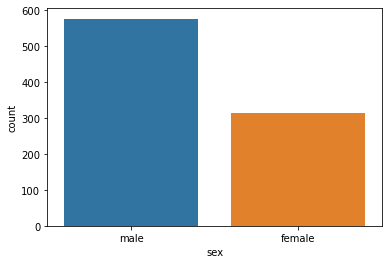

In [4]:
#question 1
sns.countplot(x ='sex',data=titanic_df)
plt.show()

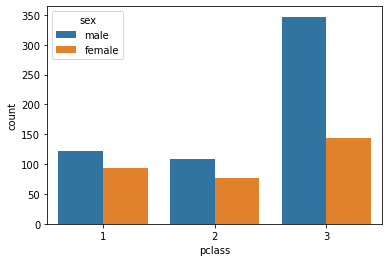

In [5]:
sns.countplot(x ='pclass',data=titanic_df, hue='sex')
plt.show()

In [6]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex


In [7]:
titanic_df['person'] = titanic_df[['age','sex']].apply( male_female_child,axis=1)
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,person
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


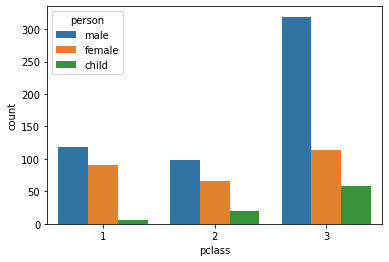

In [8]:
sns.countplot(x ='pclass',data=titanic_df, hue='person')
plt.show()

<AxesSubplot:>

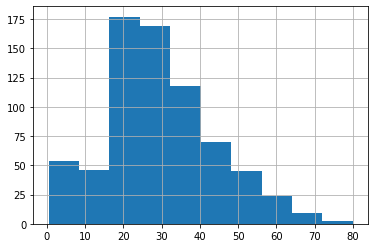

In [9]:
titanic_df['age'].hist()

In [10]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
 15  person       891 non-null    object 
dtypes: bool(2), float64(2), int64(4), object(8)
memory usage: 99.3+ KB


In [12]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
person           0
dtype: int64

In [13]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'person'],
      dtype='object')

In [14]:
#treating missing values
titanic_df['deck']= titanic_df['deck'].fillna(method='bfill')
titanic_df['age']= titanic_df['age'].fillna(titanic_df['age'].mean())

In [15]:
titanic_df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           1
embark_town    2
alive          0
alone          0
person         0
dtype: int64

In [16]:
titanic_df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,person
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,male
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,female
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,E,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,B,Queenstown,no,False,female
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,B,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,female


In [17]:
#removing Duplicate
dupTitanic_df = titanic_df.duplicated(keep='first')
finalDupTitanic_df = titanic_df[~dupTitanic_df]
finalDupTitanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,person
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,male
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,female
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,E,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,B,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,female
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


# Label Encoding

In [18]:
for column in finalDupTitanic_df.columns:
    if finalDupTitanic_df[column].dtype == np.number:
        continue 
    finalDupTitanic_df[column] = LabelEncoder().fit_transform(finalDupTitanic_df[column])  

C:\Users\APINPC\AppData\Local\Temp/ipykernel_22244/4067674439.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if finalDupTitanic_df[column].dtype == np.number:
C:\Users\APINPC\AppData\Local\Temp/ipykernel_22244/4067674439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDupTitanic_df[column] = LabelEncoder().fit_transform(finalDupTitanic_df[column])


In [19]:
#removing outliers
def Outliers(data,feature):
    IQ1 = data[feature].quantile(0.25) # identify 25%
    IQ3 = data[feature].quantile(0.75) # identify 75% 
    IQR = IQ3 - IQ1 # identify the range
    
    lowerBound = IQ1 - 1.5 * IQR
    upperBound = IQ3 + 1.5 * IQR
    
    index = data. index[ (data[feature] < lowerBound) | (data[feature] > upperBound) ]
    
    return index

In [20]:
#getting index of all the outliers
index = []
for i in finalDupTitanic_df.columns: # goes through all colums in the dataset
    index.extend(Outliers(finalDupTitanic_df, i))# this passes dataset and the column of interest
index = set(index)
print('Total number of outliers are {}'.format(len(index)))

#Dropping all the outliers
finalDupTitanic_df. drop(index, inplace = True, axis = 0)
finalDupTitanic_df.shape


Total number of outliers are 301


C:\Users\APINPC\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(543, 16)

<AxesSubplot:>

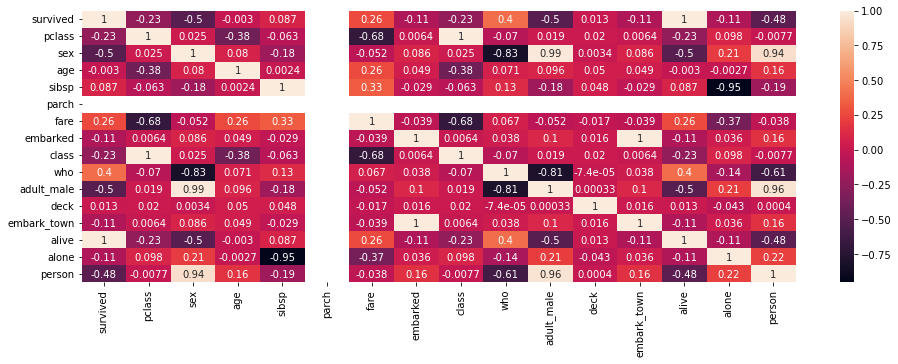

In [21]:
# correlation between attributes

pd.set_option('display.width', 100)

plt.figure(figsize=(16,5))

#sns. heatmap(data.corr())

sns.heatmap(finalDupTitanic_df.corr(), annot= True)

In [23]:
# drop some features based on the above muticolinearity
finalTitanic_df= finalDupTitanic_df.drop(['survived','parch','embarked','person','adult_male'], axis=1)
finalTitanic_df

,pclass,sex,age,sibsp,fare,class,who,deck,embark_town,alive,alone
0,2,1,22.000000,1,7.2500,2,1,2,2,0,0
2,2,0,26.000000,0,7.9250,2,2,2,2,1,1
3,0,0,35.000000,1,53.1000,0,2,2,2,1,0
4,2,1,35.000000,0,8.0500,2,1,4,2,0,1
5,2,1,29.699118,0,8.4583,2,1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
883,1,1,28.000000,0,10.5000,1,1,1,2,0,1
886,1,1,27.000000,0,13.0000,1,1,1,2,0,1
887,0,0,19.000000,0,30.0000,0,2,1,2,1,1
889,0,1,26.000000,0,30.0000,0,1,2,0,1,1


In [24]:
finalTitanic_df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'fare', 'class', 'who', 'deck', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# Rearrange Feature (make alive target variable)

In [33]:
TitanicColumns=['pclass', 'sex', 'age', 'sibsp', 'fare', 'class', 'who', 'deck', 'embark_town', 'alone', 'alive']
#titanicDataframe
finalTitanic_df = finalTitanic_df[TitanicColumns]

In [34]:
finalTitanic_df

,pclass,sex,age,sibsp,fare,class,who,deck,embark_town,alone,alive
0,2,1,22.000000,1,7.2500,2,1,2,2,0,0
2,2,0,26.000000,0,7.9250,2,2,2,2,1,1
3,0,0,35.000000,1,53.1000,0,2,2,2,0,1
4,2,1,35.000000,0,8.0500,2,1,4,2,1,0
5,2,1,29.699118,0,8.4583,2,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
883,1,1,28.000000,0,10.5000,1,1,1,2,1,0
886,1,1,27.000000,0,13.0000,1,1,1,2,1,0
887,0,0,19.000000,0,30.0000,0,2,1,2,1,1
889,0,1,26.000000,0,30.0000,0,1,2,0,1,1


In [35]:
finalTitanic_df.describe()

,pclass,sex,age,sibsp,fare,class,who,deck,embark_town,alone,alive
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,1.460405,0.742173,30.174767,0.206262,15.537215,1.460405,1.220994,2.458564,1.600368,0.813996,0.313076
std,0.752485,0.437842,9.276759,0.452339,12.890960,0.752485,0.461589,1.493416,0.734345,0.389468,0.464172
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,24.000000,0.000000,7.781250,1.000000,1.000000,1.000000,1.500000,1.000000,0.000000
50%,2.000000,1.000000,29.699118,0.000000,9.500000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,1.000000,34.000000,0.000000,17.900000,2.000000,1.000000,4.000000,2.000000,1.000000,1.000000
max,2.000000,1.000000,57.000000,2.000000,61.175000,2.000000,2.000000,7.000000,2.000000,1.000000,1.000000


In [ ]:
#using primary Type as the feature in understanding normal disdistribution
# rule 1: what is the arithmetic centre point between the max and min of fare = 53.39
#         what is the 50% 0f fare features= 9.5
# rule 2:what is the mean of fare feature=15.53
#        what is the 50% of fare features= 9.5
# is the logic centre point identical 50%? NO.
# is the mean identical 50%? NO.
#Is the data normal? NO
#why?
#because rule 1&2 were not met. for a data to be normalized both rules must me met.

# FEATURE TRANSFORMATION

# Rescaling

In [40]:
#seperate Outcome variabele from input variable
array = finalTitanic_df.values
X_arr = array[:,0:10]
Y = array[:,10]
demo= MinMaxScaler(feature_range=(0,1))
rescaledX= demo.fit_transform(X=X_arr)
rescaledXdf = pd.DataFrame(rescaledX)
rescaledXdf.columns = ['pclass', 'sex', 'age', 'sibsp', 'fare', 'class', 'who', 'deck', 'embark_town', 'alone']
rescaledXdf['alive'] = Y
rescaledXdf

,pclass,sex,age,sibsp,fare,class,who,deck,embark_town,alone,alive
0,1.0,1.0,0.326923,0.5,0.118512,1.0,0.5,0.285714,1.0,0.0,0.0
1,1.0,0.0,0.403846,0.0,0.129546,1.0,1.0,0.285714,1.0,1.0,1.0
2,0.0,0.0,0.576923,0.5,0.868002,0.0,1.0,0.285714,1.0,0.0,1.0
3,1.0,1.0,0.576923,0.0,0.131590,1.0,0.5,0.571429,1.0,1.0,0.0
4,1.0,1.0,0.474983,0.0,0.138264,1.0,0.5,0.571429,0.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
538,0.5,1.0,0.442308,0.0,0.171639,0.5,0.5,0.142857,1.0,1.0,0.0
539,0.5,1.0,0.423077,0.0,0.212505,0.5,0.5,0.142857,1.0,1.0,0.0
540,0.0,0.0,0.269231,0.0,0.490396,0.0,1.0,0.142857,1.0,1.0,1.0
541,0.0,1.0,0.403846,0.0,0.490396,0.0,0.5,0.285714,0.0,1.0,1.0


# normalization

In [41]:
#normalize
array = rescaledXdf.values
# seperate array into input and output outcomes
 
X = array[0:, 0:10]
Y = array[:,10]
scaler = Normalizer().fit(X)
normalizedX= scaler.transform(X)
normDF =pd.DataFrame(normalizedX, columns = ['pclass', 'sex', 'age', 'sibsp', 'fare', 'class', 'who', 'deck', 'embark_town', 'alone'])
normDF['alive'] = Y
normDF

,pclass,sex,age,sibsp,fare,class,who,deck,embark_town,alone,alive
0,0.461140,0.461140,0.150757,0.230570,0.054651,0.461140,0.230570,0.131754,0.461140,0.000000,0.0
1,0.435958,0.000000,0.176060,0.000000,0.056477,0.435958,0.435958,0.124560,0.435958,0.435958,1.0
2,0.000000,0.000000,0.312060,0.270452,0.469506,0.000000,0.540904,0.154544,0.540904,0.000000,1.0
3,0.410766,0.410766,0.236980,0.000000,0.054053,0.410766,0.205383,0.234723,0.410766,0.410766,0.0
4,0.444061,0.444061,0.210921,0.000000,0.061398,0.444061,0.222030,0.253749,0.222030,0.444061,0.0
...,...,...,...,...,...,...,...,...,...,...,...
538,0.250141,0.500281,0.221278,0.000000,0.085868,0.250141,0.250141,0.071469,0.500281,0.500281,0.0
539,0.250170,0.500340,0.211682,0.000000,0.106325,0.250170,0.250170,0.071477,0.500340,0.500340,0.0
540,0.000000,0.000000,0.147463,0.000000,0.268599,0.000000,0.547719,0.078246,0.547719,0.547719,1.0
541,0.000000,0.604651,0.244186,0.000000,0.296518,0.000000,0.302325,0.172757,0.000000,0.604651,1.0


In [42]:
normDF.describe()

,pclass,sex,age,sibsp,fare,class,who,deck,embark_town,alone,alive
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,0.328882,0.340483,0.226745,0.051632,0.123763,0.328882,0.287599,0.162829,0.365484,0.374068,0.313076
std,0.163868,0.204861,0.087818,0.111393,0.110545,0.163868,0.123416,0.098933,0.170974,0.183706,0.464172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246059,0.000000,0.165024,0.000000,0.055019,0.246059,0.212637,0.074274,0.332496,0.411481,0.000000
50%,0.416104,0.426612,0.217661,0.000000,0.066063,0.416104,0.235297,0.145974,0.427090,0.431384,0.000000
75%,0.436165,0.471849,0.269330,0.000000,0.141996,0.436165,0.299959,0.237175,0.476278,0.477428,1.000000
max,0.650998,0.619932,0.539101,0.464146,0.542012,0.650998,0.710613,0.646781,0.569364,0.623836,1.000000
